In [18]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
import plotly.express as px
import plotly.graph_objs as go

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') 

In [2]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Configure API key
quandl.ApiConfig.api_key = 'zZEosXhXs2pxDKXeUnEp'

In [17]:
data_1 = quandl.get('FRED/NROUST')

In [6]:
#Create path
path = '/Users/owner/Documents/Career foundry/Course 6'

In [7]:
# Import data
df = pd.read_csv(os.path.join(path, 'Cleaned Data', 'gun_violence_totals.csv'))

In [10]:
df.tail(20)

,Unnamed: 0,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
471966,471966,480327,2013-02-11,Delaware,Wilmington,500 North King Street,3,2,2013,2,11,0,5
471967,471967,479603,2013-02-09,Louisiana,New Orleans,400 block of Bourbon Street,0,4,2013,2,9,5,4
471968,471968,479592,2013-02-07,Illinois,Chicago,2500 block of East 75th Street,0,4,2013,2,7,3,4
471969,471969,479580,2013-02-03,California,Yuba (county),5800 block of Poplar Avenue,1,3,2013,2,3,6,4
471970,471970,479573,2013-02-02,Tennessee,Memphis,2514 Mount Moriah,0,5,2013,2,2,5,5
471971,471971,479460,2013-01-26,Ohio,Springfield,601 West Main Street,1,3,2013,1,26,5,4
471972,471972,479554,2013-01-26,District of Columbia,Washington,2403 Benning Road Northeast,0,5,2013,1,26,5,5
471973,471973,479561,2013-01-26,Louisiana,Charenton,1000 block of Flat Town Road,2,3,2013,1,26,5,5
471974,471974,479413,2013-01-25,Missouri,Saint Louis,W Florissant Ave and Riverview Blvd,1,3,2013,1,25,4,4
471975,471975,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,2013,1,23,2,7


In [13]:
data = quandl.get('FRED/NROUST', start_date='2013-01-01', end_date='2022-12-31')

In [14]:
data.head()

,Value
Date,
2013-01-01,5.516897
2013-04-01,5.370587
2013-07-01,5.265987
2013-10-01,5.150994
2014-01-01,5.045110


In [15]:
data.shape

(40, 1)

In [16]:
data.columns

Index(['Value'], dtype='object')

In [18]:
data_1.shape

(332, 1)

In [19]:
data_1.head(10)

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182
1950-04-01,5.287866
1950-07-01,5.294604
1950-10-01,5.301367
1951-01-01,5.308113


I've created a subset of data covering the dates for my assignment. Instead of starting from 1949, I'm starting the data from 2013. This significantly decreases the number of data points I can use, but it covers the years for my research. 

In [20]:
%matplotlib inline

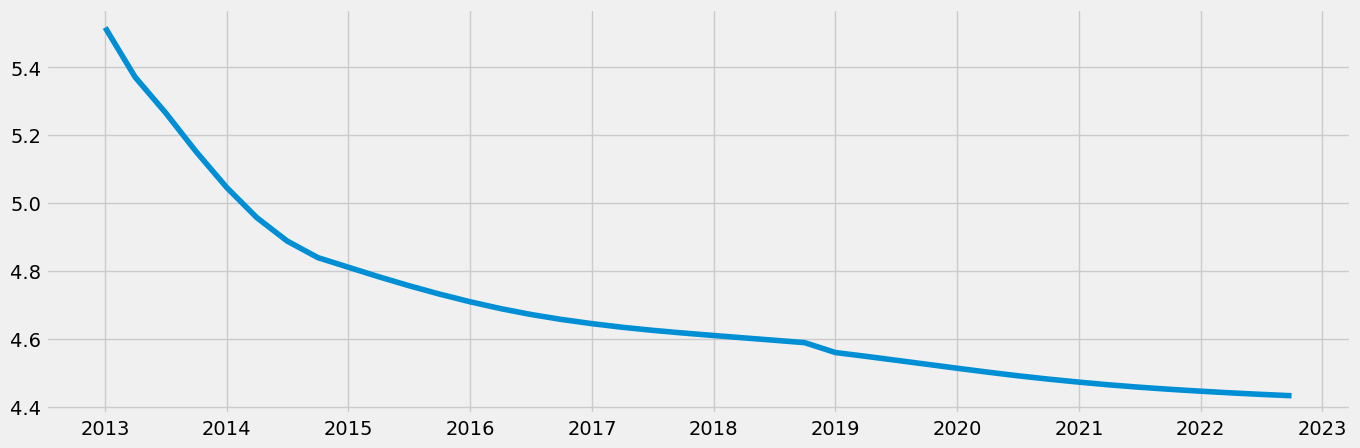

In [21]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

# Decompose Data

In [23]:
# Decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [24]:
# Define fixed size for all charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

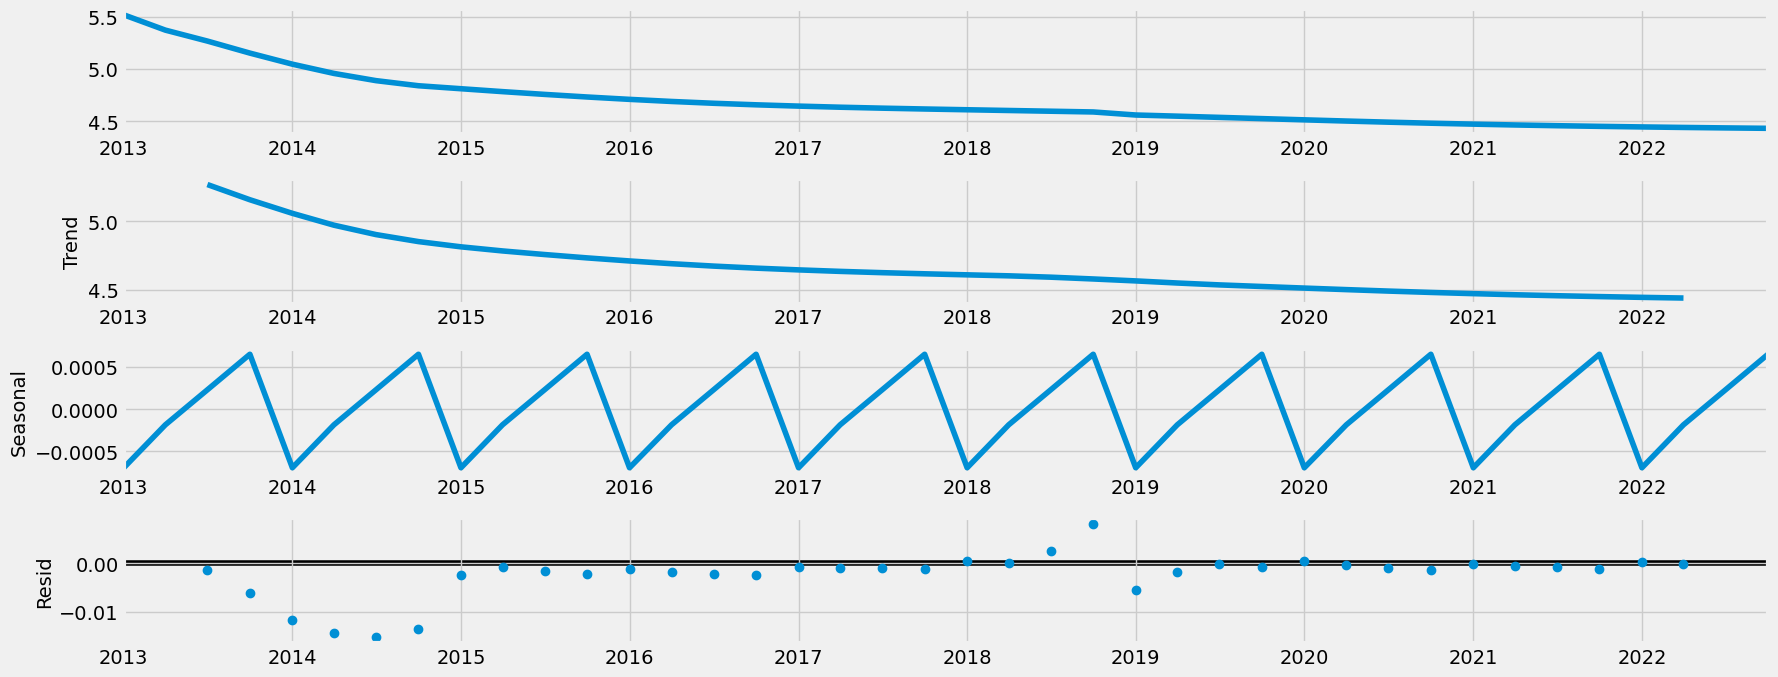

In [25]:
# Plot separate components

decomposition.plot()
plt.show()


Observations
The trend is a negative trend with slight variance
There is seasonality present in this data. 
There seems to be noise in the beginning and then decreases. 
I would expect this data to be non-stationary because there is a clear downward trend.

# Dickey-Fuller Test

In [26]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.053627
p-value                         0.263566
Number of Lags Used             1.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


Test Statistic -2.05 > critical value -2.94 

The null hypothesis is not rejected meaning that there is a unit root in the data.

The data is non-stationary.

In [27]:
#perform differencing
data_diff = data - data.shift(1)

In [28]:
#Remove missing values from differencing so dickey-fuller test can be done again
data_diff.dropna(inplace = True)

In [29]:
data_diff.head()

,Value
Date,
2013-04-01,-0.146310
2013-07-01,-0.104600
2013-10-01,-0.114993
2014-01-01,-0.105884
2014-04-01,-0.088491


In [30]:
data_diff.columns

Index(['Value'], dtype='object')

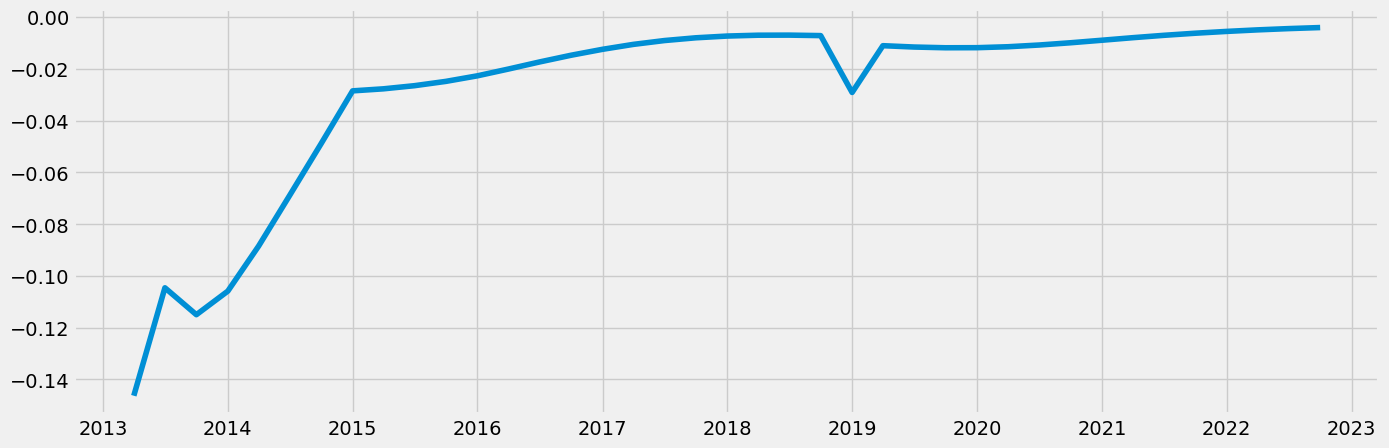

In [31]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [32]:
#run dickey-fuller test again
#can call dickey_fuller as it was defined previously
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.605819
p-value                         0.005651
Number of Lags Used             1.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


Observations
test statistic, -3.6 < critical value (5%), -2.94.

The null hypothesis is rejected meaning that there is not a unit root in the data.

This can be determined because the test statistic is less than the critical value (we are working with a significance level of 5%).

The data is stationary.

# Check Autocorrelations

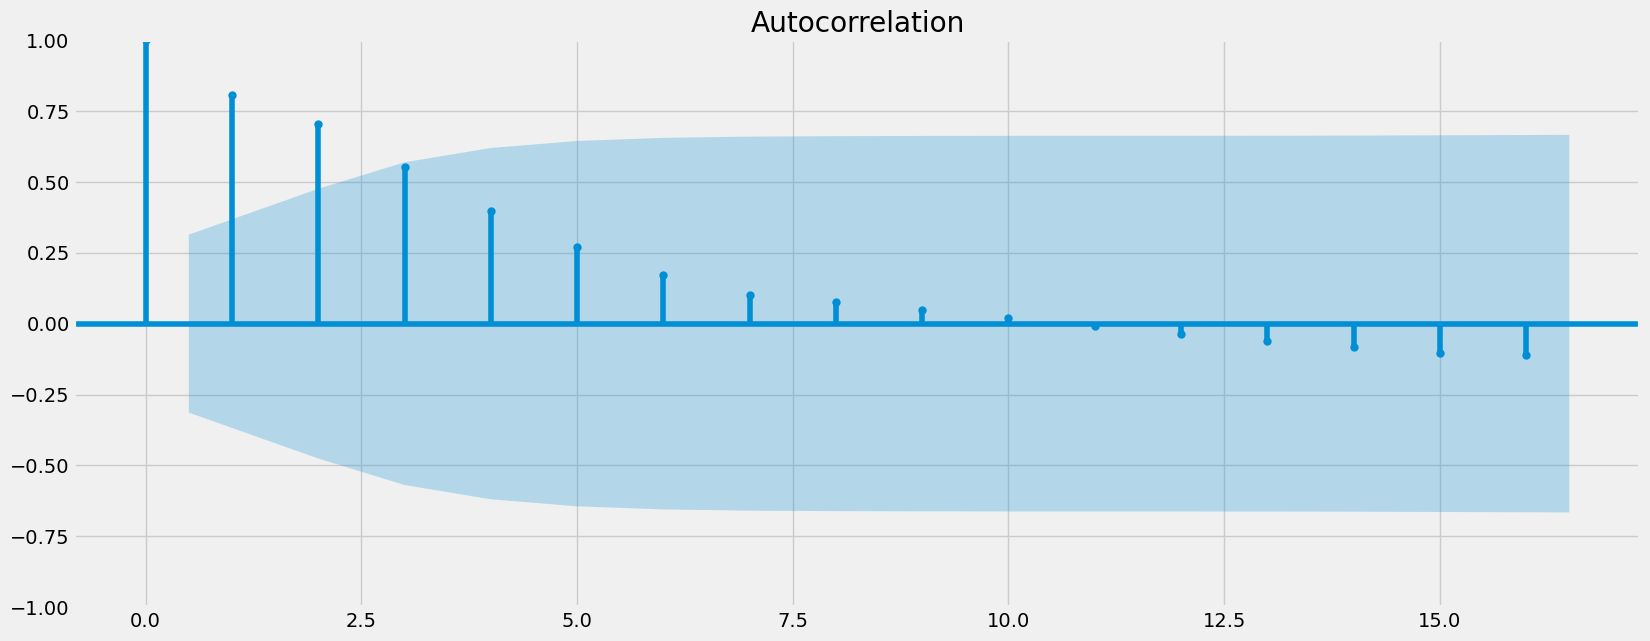

In [33]:
#Create a plot of autocorrelations

# Here, you import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_diff)
plt.show()

The autocorrelation plot provides strong evidence of data stationarity, corroborating the Dickey-Fuller test results. It reveals three lags extending beyond the blue confidence interval edge, indicating robust stationarity. Further confirmation comes from the second Dickey-Fuller test, with a low p-value of 0.005651, which is below the acceptable threshold (p<0.05).

In [34]:
#export 'data'
data.to_csv(os.path.join(path, 'Cleaned Data', 'Time_Series.csv'))

In [27]:
# 2014 time series
temp = df[df['year'] == 2014].groupby('date').agg({'state' : 'count', 'people_killed' : 'sum', 'people_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Figure(data = go.Scatter(x = temp.date, y = temp.incidents, marker_color='indianred', text="Total Incidences"))
trace2 = go.Figure(data = go.Scatter(x = temp.date, y = temp.people_killed, marker_color='blue', text="Total Killed"))
trace3 = go.Figure(data = go.Scatter(x = temp.date, y = temp.people_injured, marker_color='purple', text="Total Injured"))

data_2 = [trace1, trace2, trace3]
layout = dict(height=350, title = 'Gun Violence Incidents - 2014', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data= data_2, layout = layout)
fig.show()

AttributeError: 'dict' object has no attribute 'show'